# Reports: File summation script
The following script takes in a group of files as inputs. Then it add them together for computation and finally it exports the original inputs as a new file. In this example, the input files are print reports .cvs that had been prepared for sumation in the other script "File preparation script".  The script can be easily adapted to many other cases.

In [15]:
#Import libraries
import pandas as pd
#pd.options.display.max_rows = 650
#pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### Read input .csv files

In [3]:
print_data1 = pd.read_csv('print_data_0817.csv') 
print_data2 = pd.read_csv('print_data_0917.csv') 
print_data3 = pd.read_csv('print_data_1017.csv') 
print_data4 = pd.read_csv('print_data_1117.csv') 
print_data5 = pd.read_csv('print_data_1217.csv') 
print_data6 = pd.read_csv('print_data_0118.csv') 
print_data7 = pd.read_csv('print_data_0218.csv')
print_data8 = pd.read_csv('print_data_0318.csv') 
print_data9 = pd.read_csv('print_data_0418.csv') 
print_data10 = pd.read_csv('print_data_0918.csv') 
print_data11 = pd.read_csv('print_data_1018.csv') 

### Jobs per month

In [4]:
print_data1.shape, print_data2.shape, print_data3.shape, print_data4.shape, print_data5.shape,\
                   print_data6.shape, print_data7.shape, print_data8.shape, print_data9.shape, \
                   print_data10.shape, print_data11.shape,

((39, 10),
 (1173, 10),
 (2200, 10),
 (1547, 10),
 (1922, 10),
 (1782, 10),
 (1328, 10),
 (1601, 10),
 (1601, 10),
 (1716, 10),
 (2107, 10))

In [5]:
# Combine months in one file
print_data = pd.concat([print_data1, print_data2, print_data3, print_data4, 
                        print_data5, print_data6, print_data7, print_data8,
                        print_data8, print_data9, print_data10, print_data11], 
                        axis = 0, sort=True)

### Total jobs
This is the amount of total jobs, not the amount of total prints

In [6]:
print_data.shape

(18617, 10)

In [7]:
print_data.head(0)

,Unnamed: 0,amount,cost,date,full_name,pin,properties,type,units,user


### Total prints

In [8]:
print_data.units.sum()

360324

### Total Cost

In [9]:
print_data.amount.sum()

3583.09

### Cleaning

In [10]:
print_data.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
print_data.dtypes

amount        float64
cost          float64
date           object
full_name      object
pin           float64
properties     object
type           object
units           int64
user           object
dtype: object

### Table Statistics

In [12]:
print_data['units'].describe()

count    18617.000000
mean        19.354568
std         86.418137
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       2907.000000
Name: units, dtype: float64

### Totals by user

In [16]:
print_total = print_data.groupby('pin').units.sum()
total_print = print_total.sort_values(ascending=False)
total_print.head(25) # Change the number to the number of users you want to preview

pin
5.516420e+11    51633
5.275233e+06    24081
5.516420e+11    22115
1.469268e+07    19158
1.063440e+06    16749
6.304973e+06    14782
1.104448e+06    12867
1.063648e+06    12755
1.104508e+06    11838
5.516393e+11    10903
1.063488e+06     9010
5.516420e+11     8581
1.104396e+06     8534
9.500145e+06     7237
5.516420e+11     7214
1.104576e+06     6664
1.071807e+06     6398
6.304885e+06     6371
1.071743e+06     6204
5.516393e+11     6196
5.275297e+06     6114
1.104620e+06     5748
1.104588e+06     5033
1.104540e+06     4963
9.499914e+06     4370
Name: units, dtype: int64

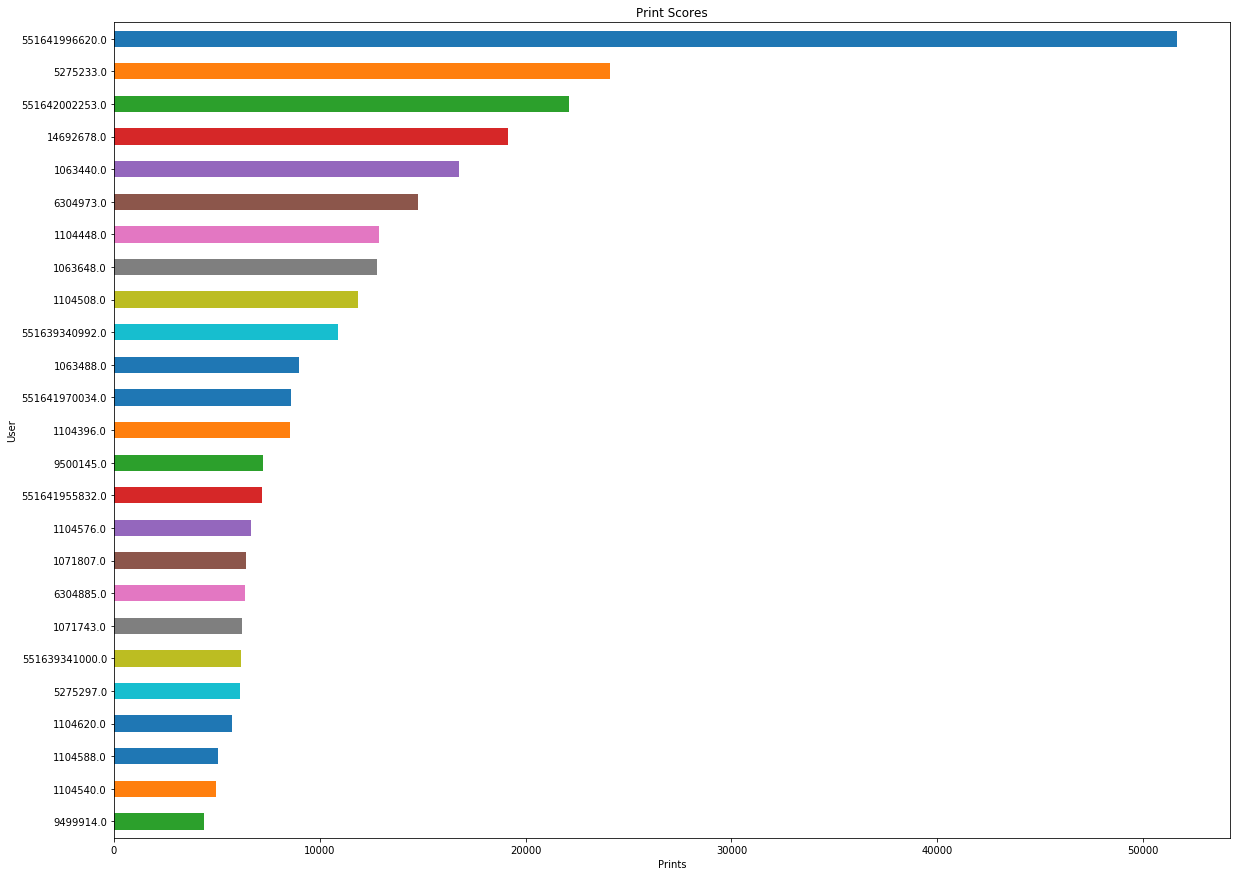

In [14]:
total_print.iloc[:25].plot(kind='barh', figsize=(20,15))
plt.gca().invert_yaxis()
plt.xlabel("Prints")
plt.ylabel("User")
plt.title("Print Scores")
plt.show();

### Input .csv file "output" name here

In [94]:
# Export to a new .csv file
print_data.to_csv('print_data_all.csv', index=False)